## STEP 0: Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

C:\Users\laptop\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import bottleneck
import pandas
print(bottleneck.__version__)
print(pandas.__version__)

1.3.5
2.3.3


In [5]:
%pip install pandas==1.3.5

  Using cached pandas-1.3.5.tar.gz (4.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2481 lines of output]
  <string>:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  C:\Users\laptop\AppData\Local\Temp\pip-build-env-dy4vpmlh\overlay\Lib\site-packages\setuptools\dist.py:765: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_licens

## STEP 1: Sales Data Create

In [2]:
np.random.seed(42)

dates = pd.date_range(start="2023-01-01", end="2023-12-31")

sales_data = {
    "date": np.random.choice(dates, 1500),
    "state": np.random.choice(
        ["Punjab", "Delhi", "Maharashtra", "West Bengal"], 1500
    ),
    "city": np.random.choice(
        ["Amritsar", "Delhi", "Mumbai", "Kolkata"], 1500
    ),
    "category": np.random.choice(
        ["Grocery", "Clothing", "Electronics"], 1500
    ),
    "daily_sales": np.random.randint(5000, 50000, 1500),
    "units_sold": np.random.randint(10, 300, 1500)
}

sales_df = pd.DataFrame(sales_data)
sales_df.head()

,date,state,city,category,daily_sales,units_sold
0,2023-04-13,Delhi,Kolkata,Clothing,15692,15
1,2023-12-15,West Bengal,Delhi,Grocery,39057,224
2,2023-09-28,West Bengal,Mumbai,Grocery,6447,143
3,2023-04-17,Maharashtra,Delhi,Clothing,24583,294
4,2023-03-13,Maharashtra,Kolkata,Grocery,27765,135


## STEP 2: Festival Calendar Data Create

In [3]:
festival_data = {
    "festival": ["Diwali", "Eid", "Durga Puja", "Christmas"],
    "start_date": ["2023-11-10", "2023-04-21", "2023-10-20", "2023-12-24"],
    "end_date": ["2023-11-15", "2023-04-23", "2023-10-24", "2023-12-26"]
}

festival_df = pd.DataFrame(festival_data)
festival_df["start_date"] = pd.to_datetime(festival_df["start_date"])
festival_df["end_date"] = pd.to_datetime(festival_df["end_date"])

festival_df

,festival,start_date,end_date
0,Diwali,2023-11-10,2023-11-15
1,Eid,2023-04-21,2023-04-23
2,Durga Puja,2023-10-20,2023-10-24
3,Christmas,2023-12-24,2023-12-26


## STEP 3: Date Conversion + Festival Flag

In [4]:
sales_df["date"] = pd.to_datetime(sales_df["date"])
sales_df["is_festival"] = 0

for _, row in festival_df.iterrows():
    sales_df.loc[
        (sales_df["date"] >= row["start_date"]) &
        (sales_df["date"] <= row["end_date"]),
        "is_festival"
    ] = 1

sales_df.head()

,date,state,city,category,daily_sales,units_sold,is_festival
0,2023-04-13,Delhi,Kolkata,Clothing,15692,15,0
1,2023-12-15,West Bengal,Delhi,Grocery,39057,224,0
2,2023-09-28,West Bengal,Mumbai,Grocery,6447,143,0
3,2023-04-17,Maharashtra,Delhi,Clothing,24583,294,0
4,2023-03-13,Maharashtra,Kolkata,Grocery,27765,135,0


## STEP 4: Basic Data Understanding

In [5]:
sales_df.shape

(1500, 7)

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1500 non-null   datetime64[ns]
 1   state        1500 non-null   object        
 2   city         1500 non-null   object        
 3   category     1500 non-null   object        
 4   daily_sales  1500 non-null   int32         
 5   units_sold   1500 non-null   int32         
 6   is_festival  1500 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 70.4+ KB


In [7]:
sales_df.describe()

,date,daily_sales,units_sold,is_festival
count,1500,1500.0000,1500.000000,1500.000000
mean,2023-07-02 03:48:28.800000,27312.9240,149.536000,0.057333
min,2023-01-01 00:00:00,5016.0000,10.000000,0.000000
25%,2023-04-07 18:00:00,16000.0000,78.000000,0.000000
50%,2023-06-29 12:00:00,26961.5000,148.000000,0.000000
75%,2023-10-01 06:00:00,38108.7500,220.000000,0.000000
max,2023-12-31 00:00:00,49993.0000,299.000000,1.000000
std,NaN,12998.4757,83.123613,0.232556


In [8]:
sales_df.isnull().sum()

date           0
state          0
city           0
category       0
daily_sales    0
units_sold     0
is_festival    0
dtype: int64

## STEP 5: Category-wise Average Sales

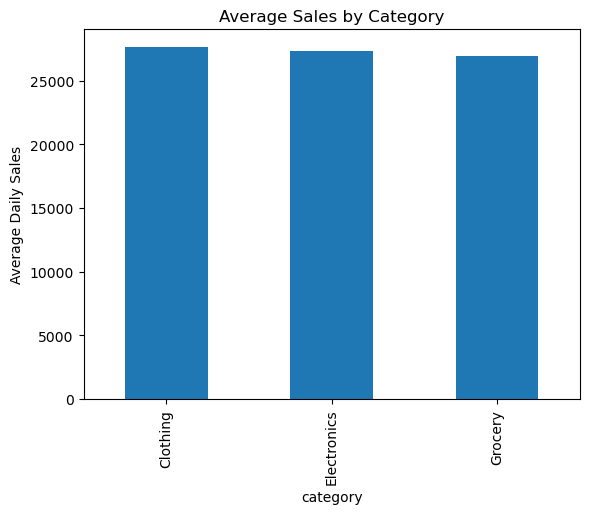

In [9]:
category_sales = sales_df.groupby("category")["daily_sales"].mean()

category_sales.plot(
    kind="bar",
    title="Average Sales by Category"
)
plt.ylabel("Average Daily Sales")
plt.show()

## STEP 6: Festival vs Non-Festival Sales

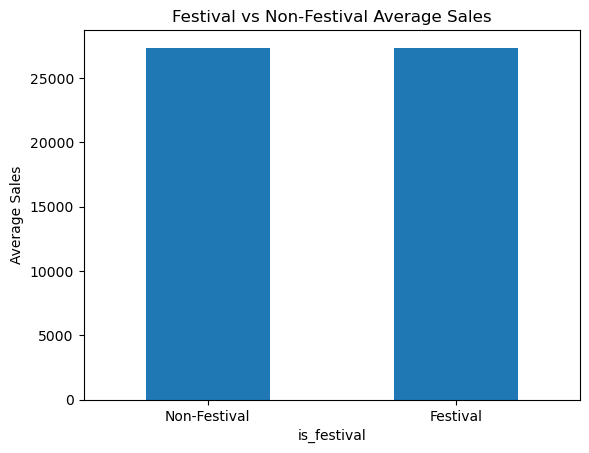

In [10]:
festival_sales = sales_df.groupby("is_festival")["daily_sales"].mean()

festival_sales.plot(
    kind="bar",
    title="Festival vs Non-Festival Average Sales"
)
plt.xticks([0, 1], ["Non-Festival", "Festival"], rotation=0)
plt.ylabel("Average Sales")
plt.show()

## STEP 7: Monthly Sales Trend

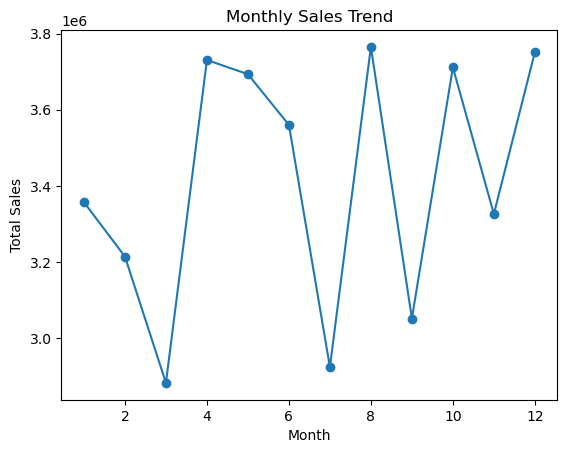

In [11]:
sales_df["month"] = sales_df["date"].dt.month

monthly_sales = sales_df.groupby("month")["daily_sales"].sum()

monthly_sales.plot(
    kind="line",
    marker="o",
    title="Monthly Sales Trend"
)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

## STEP 8: City-wise Festival Impact

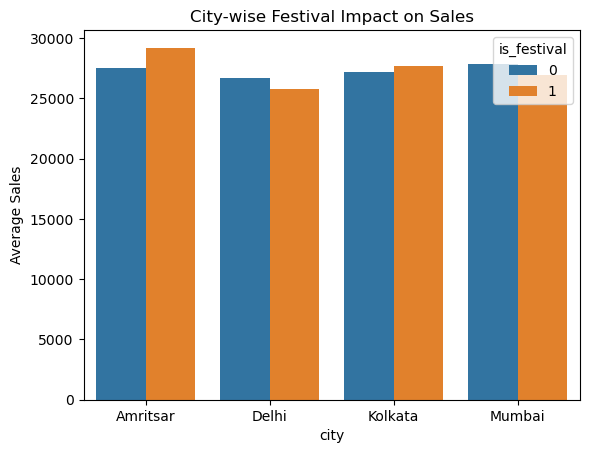

In [12]:
city_festival_sales = (
    sales_df
    .groupby(["city", "is_festival"])["daily_sales"]
    .mean()
    .reset_index()
)

sns.barplot(
    data=city_festival_sales,
    x="city",
    y="daily_sales",
    hue="is_festival"
)

plt.title("City-wise Festival Impact on Sales")
plt.ylabel("Average Sales")
plt.show()

## STEP 10.1: Relevant Columns Select

In [14]:
corr_df = sales_df[["daily_sales", "units_sold", "is_festival"]]
corr_df.head()

,daily_sales,units_sold,is_festival
0,15692,15,0
1,39057,224,0
2,6447,143,0
3,24583,294,0
4,27765,135,0


## STEP 10.2: Correlation Matrix

In [15]:
corr_matrix = corr_df.corr()
corr_matrix

,daily_sales,units_sold,is_festival
daily_sales,1.000000,0.02073,0.000734
units_sold,0.020730,1.00000,0.012110
is_festival,0.000734,0.01211,1.000000


## STEP 10.3: Correlation Heatmap

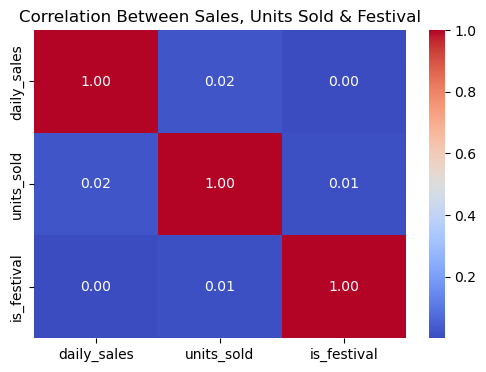

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Between Sales, Units Sold & Festival")
plt.show()

## STEP 11: Category-wise Correlation

In [17]:
category_corr = (
    sales_df
    .groupby("category")[["daily_sales", "units_sold"]]
    .corr()
)

category_corr

daily_sales  units_sold
category                                        
Clothing    daily_sales     1.000000   -0.019272
            units_sold     -0.019272    1.000000
Electronics daily_sales     1.000000   -0.002378
            units_sold     -0.002378    1.000000
Grocery     daily_sales     1.000000    0.083372
            units_sold      0.083372    1.000000

## STEP 12: Scatter Plot

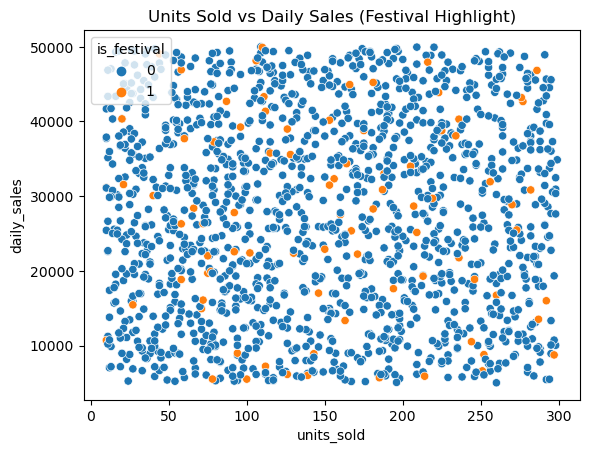

In [18]:
sns.scatterplot(
    data=sales_df,
    x="units_sold",
    y="daily_sales",
    hue="is_festival"
)
plt.title("Units Sold vs Daily Sales (Festival Highlight)")
plt.show()

## STEP 9: Save Final Dataset

In [19]:
sales_df.to_csv("final_sales_data.csv", index=False)

## Objective
This notebook analyzes the impact of Indian festivals on local business sales using exploratory data analysis.


## Key Insight
Average sales during festival periods are significantly higher compared to non-festival days.
